In [1]:
import numpy as np
import pandas as pd
import sys
import seaborn as sn

def _pretty(df):
    """ Make table easier to read"""
    sn.heatmap(df, annot=True)

In [2]:
sys.path.append('../marcot')

In [3]:
import process_model
import layers

In [4]:
import re
from io import StringIO
import tabulate
def read_tbl(tbl, dtype=None):

    # Remove any decorative line
    tbl = re.sub('-[-+]+-\n', '', tbl)

    df =  pd.read_csv(StringIO(tbl), index_col=0, sep='|')

    # remove any leading or trailing spaces from index and columns labels
    df.index = df.index.str.strip()
    df.index.name.strip()
    df.columns = df.columns.str.strip()
    
    # Convert to right datatype (float, int, etc.)
    if dtype:
        df = df.astype(dtype)
    
    # If any remaining "object" datatype (i.e., string), also strip
    if 'object' in set(df.dtypes.astype(str)):
        df = df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)
    
    return df


def to_table_command(df, name=''):
    
    # Convert dataframe
    tbl = tabulate.tabulate(df, tablefmt='presto', headers=df.columns)

    
    # Extract type information
    dtypes = df.dtypes.astype('str')

    # Convert dtype data to string or dict 
    if len(set(dtypes)) == 1:
        dtypes = "'" + dtypes[0] + "'"
    else:
        dtypes = dtypes.to_dict()

    # put together command
    table_command ='{} = read_tbl(""" \n{}\n""", dtype={})'.format( name, tbl, dtypes)
    
    print(table_command)
    
    return table_command

# Full TC - SUT demo

A technology that takes residual material (made up of plastics, glass, etc.), sorts in "bundle" and "reject", and removes some water (water emission). The water removal implies the use of a pump (capital), which will eventually become an old pump.

The process model determines the amounts of outputs and their composition

## Define SUT and layers

In [5]:
filename = 'composition_layers_tc.xlsx'
df_goods = pd.read_excel(filename,'lay_good').fillna(value=0.)
df_subst = pd.read_excel(filename,'lay_subst').fillna(value=0.)
df_cons = pd.read_excel(filename,'lay_cons').fillna(value=0.)
df_supply = pd.read_excel(filename,'supply').fillna(value=0.)
df_tc = pd.read_excel(filename,'tc')

In [6]:
gen = process_model.ProcessModel('123')

lay.goods:


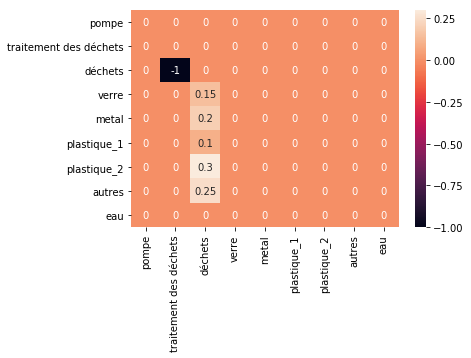

In [7]:
gen.lay.goods = df_goods
gen.lay.subst = df_subst
gen.lay.cons = df_cons
print('lay.goods:')
_pretty(gen.lay.goods)


lay.subst:


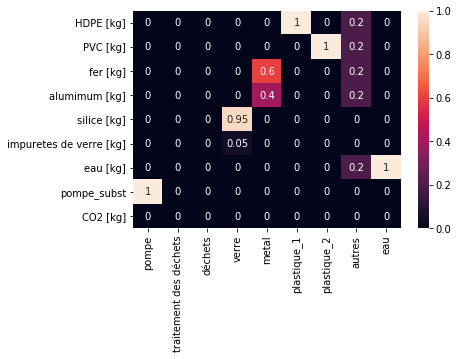

In [8]:
print('lay.subst:')
_pretty(gen.lay.subst)

In [9]:
gen.lay.net_subst()

pompe  traitement des déchets  déchets  verre  metal  \
O [kg] n.e.s.              0.0                  0.0000   0.0000   0.00    0.0   
Cl [kg] n.e.s.             0.0                  0.0000   0.0000   0.00    0.0   
PVC [kg]                   0.0                 -0.3500   0.3500   0.00    0.0   
pompe_subst                1.0                  0.0000   0.0000   0.00    0.0   
fer [kg]                   0.0                 -0.1700   0.1700   0.00    0.6   
N [kg] n.e.s.              0.0                  0.0000   0.0000   0.00    0.0   
C [kg] n.e.s.              0.0                  0.0000   0.0000   0.00    0.0   
Si [kg] n.e.s.             0.0                  0.0000   0.0000   0.00    0.0   
unité n.e.s.               0.0                  0.0000   0.0000   0.00    0.0   
silice [kg]                0.0                 -0.1425   0.1425   0.95    0.0   
HDPE [kg]                  0.0                 -0.1500   0.1500   0.00    0.0   
Fe [kg] n.e.s.             0.0                  0.0000   0.0000   0.00    0.0   
impuretes de verre [kg]    0.0                 -0.0075   0.0075   0.05    0.0   
eau [kg]                   0.0                 -0.0500   0.0500   0.00    0.0   
Al [kg] n.e.s.             0.0                  0.0000   0.0000   0.00    0.0   
Cu [kg] n.e.s.             0.0                  0.0000   0.0000   0.00    0.0   
alumimum [kg]              0.0                 -0.1300   0.1300   0.00    0.4   
CO2 [kg]                   0.0                  0.0000   0.0000   0.00    0.0   
H [kg] n.e.s.              0.0                  0.0000   0.0000   0.00    0.0   
Ca [kg] n.e.s.             0.0                  0.0000   0.0000   0.00    0.0   
S [kg] n.e.s.              0.0                  0.0000   0.0000   0.00    0.0   

                         plastique_1  plastique_2  autres  eau  
O [kg] n.e.s.                    0.0          0.0     0.0  0.0  
Cl [kg] n.e.s.                   0.0          0.0     0.0  0.0  
PVC [kg]                         0.0          1.0     0.2  0.0  
pompe_subst                      0.0          0.0     0.0  0.0  
fer [kg]                         0.0          0.0     0.2  0.0  
N [kg] n.e.s.                    0.0          0.0     0.0  0.0  
C [kg] n.e.s.                    0.0          0.0     0.0  0.0  
Si [kg] n.e.s.                   0.0          0.0     0.0  0.0  
unité n.e.s.                     0.0          0.0     0.0  0.0  
silice [kg]                      0.0          0.0     0.0  0.0  
HDPE [kg]                        1.0          0.0     0.2  0.0  
Fe [kg] n.e.s.                   0.0          0.0     0.0  0.0  
impuretes de verre [kg]          0.0          0.0     0.0  0.0  
eau [kg]                         0.0          0.0     0.2  1.0  
Al [kg] n.e.s.                   0.0          0.0     0.0  0.0  
Cu [kg] n.e.s.                   0.0          0.0     0.0  0.0  
alumimum [kg]                    0.0          0.0     0.2  0.0  
CO2 [kg]                         0.0          0.0     0.0  0.0  
H [kg] n.e.s.                    0.0          0.0     0.0  0.0  
Ca [kg] n.e.s.                   0.0          0.0     0.0  0.0  
S [kg] n.e.s.                    0.0          0.0     0.0  0.0

In [10]:
gen.u0 = df_supply['u']
gen.v0 = df_supply['v']
gen.f0 = df_supply['f']

In [11]:
gen.u0

pompe                     1
traitement des déchets    0
eau                       0
vieille pompe             -
ballot                    0
rejets                    0
Name: u, dtype: object

In [12]:
gen.v0

pompe                      0
traitement des déchets    15
eau                        0
vieille pompe              0
ballot                     +
rejets                     -
Name: v, dtype: object

In [13]:
gen.f0

pompe                     0.0
traitement des déchets    0.0
eau                      -5.0
vieille pompe             0.0
ballot                    0.0
rejets                    0.0
Name: f, dtype: float64

In [14]:
gen.u

## Applying TC

In [15]:
df_tc

goods                    subst      goods_out  value
0   pompe                      NaN  vieille pompe   1.00
1     NaN                HDPE [kg]         ballot   1.00
2     NaN                 PVC [kg]         ballot   1.00
3     NaN                 fer [kg]         ballot   0.97
4     NaN            alumimum [kg]         ballot   0.98
5     NaN                 fer [kg]         rejets   0.03
6     NaN            alumimum [kg]         rejets   0.02
7     NaN              silice [kg]         ballot   1.00
8     NaN  impuretes de verre [kg]         rejets   1.00
9     NaN                 eau [kg]         ballot   0.50
10    NaN                 eau [kg]         rejets   0.50

In [16]:
tc_goods, tc_subst, tc_cons= gen.calc_transfer_coefficients(df_tc)
tc_goods

vieille pompe
pompe            1.0

In [17]:
tc_subst

ballot  rejets
HDPE [kg]                  1.00    0.00
PVC [kg]                   1.00    0.00
alumimum [kg]              0.98    0.02
eau [kg]                   0.50    0.50
fer [kg]                   0.97    0.03
impuretes de verre [kg]    0.00    1.00
silice [kg]                1.00    0.00

In [18]:
# Taking our time to look around

In [19]:
gen.tc_goods

vieille pompe
pompe            1.0

In [20]:
gen.tc_subst

ballot  rejets
HDPE [kg]                  1.00    0.00
PVC [kg]                   1.00    0.00
alumimum [kg]              0.98    0.02
eau [kg]                   0.50    0.50
fer [kg]                   0.97    0.03
impuretes de verre [kg]    0.00    1.00
silice [kg]                1.00    0.00

In [21]:
gen.lay.subst.loc[gen.tc_subst.index]

pompe  traitement des déchets  déchets  verre  metal  \
HDPE [kg]                  0.0                     0.0      0.0   0.00    0.0   
PVC [kg]                   0.0                     0.0      0.0   0.00    0.0   
alumimum [kg]              0.0                     0.0      0.0   0.00    0.4   
eau [kg]                   0.0                     0.0      0.0   0.00    0.0   
fer [kg]                   0.0                     0.0      0.0   0.00    0.6   
impuretes de verre [kg]    0.0                     0.0      0.0   0.05    0.0   
silice [kg]                0.0                     0.0      0.0   0.95    0.0   

                         plastique_1  plastique_2  autres  eau  
HDPE [kg]                        1.0          0.0     0.2  0.0  
PVC [kg]                         0.0          1.0     0.2  0.0  
alumimum [kg]                    0.0          0.0     0.2  0.0  
eau [kg]                         0.0          0.0     0.2  1.0  
fer [kg]                         0.0          0.0     0.2  0.0  
impuretes de verre [kg]          0.0          0.0     0.0  0.0  
silice [kg]                      0.0          0.0     0.0  0.0

In [22]:
gen.lay.goods

pompe  traitement des déchets  déchets  verre  metal  \
pompe                     0.0                     0.0     0.00    0.0    0.0   
traitement des déchets    0.0                     0.0     0.00    0.0    0.0   
déchets                   0.0                    -1.0     0.00    0.0    0.0   
verre                     0.0                     0.0     0.15    0.0    0.0   
metal                     0.0                     0.0     0.20    0.0    0.0   
plastique_1               0.0                     0.0     0.10    0.0    0.0   
plastique_2               0.0                     0.0     0.30    0.0    0.0   
autres                    0.0                     0.0     0.25    0.0    0.0   
eau                       0.0                     0.0     0.00    0.0    0.0   

                        plastique_1  plastique_2  autres  eau  
pompe                           0.0          0.0     0.0  0.0  
traitement des déchets          0.0          0.0     0.0  0.0  
déchets                         0.0          0.0     0.0  0.0  
verre                           0.0          0.0     0.0  0.0  
metal                           0.0          0.0     0.0  0.0  
plastique_1                     0.0          0.0     0.0  0.0  
plastique_2                     0.0          0.0     0.0  0.0  
autres                          0.0          0.0     0.0  0.0  
eau                             0.0          0.0     0.0  0.0

In [23]:
gen.f0

pompe                     0.0
traitement des déchets    0.0
eau                      -5.0
vieille pompe             0.0
ballot                    0.0
rejets                    0.0
Name: f, dtype: float64

In [24]:
gen.v0

pompe                      0
traitement des déchets    15
eau                        0
vieille pompe              0
ballot                     +
rejets                     -
Name: v, dtype: object

In [25]:
inputs,outputs = gen.apply_transfer_coefficients()


In [26]:
inputs

eau                        5.0
pompe                      1.0
traitement des déchets    15.0
dtype: float64

In [27]:
outputs

vieille pompe     1.000
ballot           16.897
rejets            3.103
dtype: float64

In [28]:
gen.u

pompe                     1
traitement des déchets    0
eau                       0
vieille pompe             1
ballot                    0
rejets                    0
Name: u, dtype: object

In [29]:
gen.v

pompe                          0
traitement des déchets        15
eau                            0
vieille pompe                  0
ballot                    16.897
rejets                     3.103
Name: v, dtype: object

In [30]:
gen.f

pompe                     0.0
traitement des déchets    0.0
eau                      -5.0
vieille pompe             0.0
ballot                    0.0
rejets                    0.0
Name: f, dtype: float64

In [31]:
gen.lay.subst

eau  plastique_2    ballot  autres  metal  pompe  \
O [kg] n.e.s.            0.0          0.0  0.000000     0.0    0.0    0.0   
Cl [kg] n.e.s.           0.0          0.0  0.000000     0.0    0.0    0.0   
PVC [kg]                 0.0          1.0  0.310706     0.2    0.0    0.0   
pompe_subst              0.0          0.0  0.000000     0.0    0.0    1.0   
fer [kg]                 0.0          0.0  0.146387     0.2    0.6    0.0   
N [kg] n.e.s.            0.0          0.0  0.000000     0.0    0.0    0.0   
C [kg] n.e.s.            0.0          0.0  0.000000     0.0    0.0    0.0   
Si [kg] n.e.s.           0.0          0.0  0.000000     0.0    0.0    0.0   
unité n.e.s.             0.0          0.0  0.000000     0.0    0.0    0.0   
silice [kg]              0.0          0.0  0.126502     0.0    0.0    0.0   
HDPE [kg]                0.0          0.0  0.133160     0.2    0.0    0.0   
Fe [kg] n.e.s.           0.0          0.0  0.000000     0.0    0.0    0.0   
impuretes de verre [kg]  0.0          0.0  0.000000     0.0    0.0    0.0   
eau [kg]                 1.0          0.0  0.170149     0.2    0.0    0.0   
Al [kg] n.e.s.           0.0          0.0  0.000000     0.0    0.0    0.0   
Cu [kg] n.e.s.           0.0          0.0  0.000000     0.0    0.0    0.0   
alumimum [kg]            0.0          0.0  0.113097     0.2    0.4    0.0   
CO2 [kg]                 0.0          0.0  0.000000     0.0    0.0    0.0   
H [kg] n.e.s.            0.0          0.0  0.000000     0.0    0.0    0.0   
Ca [kg] n.e.s.           0.0          0.0  0.000000     0.0    0.0    0.0   
S [kg] n.e.s.            0.0          0.0  0.000000     0.0    0.0    0.0   

                           rejets  plastique_1  traitement des déchets  \
O [kg] n.e.s.            0.000000          0.0                     0.0   
Cl [kg] n.e.s.           0.000000          0.0                     0.0   
PVC [kg]                 0.000000          0.0                     0.0   
pompe_subst              0.000000          0.0                     0.0   
fer [kg]                 0.024654          0.0                     0.0   
N [kg] n.e.s.            0.000000          0.0                     0.0   
C [kg] n.e.s.            0.000000          0.0                     0.0   
Si [kg] n.e.s.           0.000000          0.0                     0.0   
unité n.e.s.             0.000000          0.0                     0.0   
silice [kg]              0.000000          0.0                     0.0   
HDPE [kg]                0.000000          1.0                     0.0   
Fe [kg] n.e.s.           0.000000          0.0                     0.0   
impuretes de verre [kg]  0.036255          0.0                     0.0   
eau [kg]                 0.926523          0.0                     0.0   
Al [kg] n.e.s.           0.000000          0.0                     0.0   
Cu [kg] n.e.s.           0.000000          0.0                     0.0   
alumimum [kg]            0.012568          0.0                     0.0   
CO2 [kg]                 0.000000          0.0                     0.0   
H [kg] n.e.s.            0.000000          0.0                     0.0   
Ca [kg] n.e.s.           0.000000          0.0                     0.0   
S [kg] n.e.s.            0.000000          0.0                     0.0   

                         vieille pompe  verre  déchets  
O [kg] n.e.s.                      0.0   0.00      0.0  
Cl [kg] n.e.s.                     0.0   0.00      0.0  
PVC [kg]                           0.0   0.00      0.0  
pompe_subst                        0.0   0.00      0.0  
fer [kg]                           0.0   0.00      0.0  
N [kg] n.e.s.                      0.0   0.00      0.0  
C [kg] n.e.s.                      0.0   0.00      0.0  
Si [kg] n.e.s.                     0.0   0.00      0.0  
unité n.e.s.                       0.0   0.00      0.0  
silice [kg]                        0.0   0.95      0.0  
HDPE [kg]                          0.0   0.00      0.0  
Fe [kg] n.e.s.   

In [32]:
gen.lay.net_cons()

eau  plastique_2    ballot  autres  metal  pompe    rejets  \
Al [kg]          0.0          0.0  0.113097    0.20   0.40    0.0  0.012568   
C [kg]           0.0          0.7  0.324022    0.30   0.00    0.0  0.000000   
Ca [kg]          0.0          0.0  0.000000    0.00   0.00    0.0  0.003626   
Cl [kg]          0.0          0.2  0.062141    0.04   0.00    0.0  0.000000   
Cu [kg]          0.0          0.0  0.007319    0.01   0.03    0.0  0.001233   
Fe [kg]          0.0          0.0  0.131748    0.18   0.54    0.0  0.022188   
H [kg]           0.3          0.1  0.108747    0.12   0.00    0.0  0.277957   
N [kg]           0.0          0.0  0.000000    0.00   0.00    0.0  0.000000   
O [kg]           0.7          0.0  0.164374    0.15   0.03    0.0  0.657050   
S [kg]           0.0          0.0  0.000000    0.00   0.00    0.0  0.000000   
Si [kg]          0.0          0.0  0.088551    0.00   0.00    0.0  0.025379   
Total mass [kg]  1.0          1.0  1.000000    1.00   1.00    0.0  1.000000   
unité            0.0          0.0  0.000000    0.00   0.00    1.0  0.000000   

                 plastique_1  traitement des déchets  vieille pompe  verre  \
Al [kg]                  0.0                -0.13000            0.0  0.000   
C [kg]                   0.8                -0.36500            0.0  0.000   
Ca [kg]                  0.0                -0.00075            0.0  0.005   
Cl [kg]                  0.0                -0.07000            0.0  0.000   
Cu [kg]                  0.0                -0.00850            0.0  0.000   
Fe [kg]                  0.0                -0.15300            0.0  0.000   
H [kg]                   0.2                -0.08000            0.0  0.000   
N [kg]                   0.0                 0.00000            0.0  0.000   
O [kg]                   0.0                -0.08775            0.0  0.295   
S [kg]                   0.0                 0.00000            0.0  0.000   
Si [kg]                  0.0                -0.10500            0.0  0.700   
Total mass [kg]          1.0                -1.00000            0.0  1.000   
unité                    0.0                 0.00000           -1.0  0.000   

                 déchets  
Al [kg]          0.13000  
C [kg]           0.36500  
Ca [kg]          0.00075  
Cl [kg]          0.07000  
Cu [kg]          0.00850  
Fe [kg]          0.15300  
H [kg]           0.08000  
N [kg]           0.00000  
O [kg]           0.08775  
S [kg]           0.00000  
Si [kg]          0.10500  
Total mass [kg]  1.00000  
unité            0.00000